In [1]:
import astropy.io.fits
import matplotlib.pyplot as plt
import numpy as np
from astropy.table import Table, hstack, Column

### This notebook is intended develop more catalog exploration skills and more
### advanced plotting! 

In [3]:
#replace the catalog path here with the path to your local path
path = '/Users/minathoresen/Desktop/JPL_summer_research/CH2O_CMZoom/'

### this is where you actually load in the catalog table
catalog = Table.read(path+'megacatalog_team_acc_final_say.fits')

In [5]:
### plot the list of catalog keys! Note that there are some new ones.
print(catalog.keys())

['index', 'area_ellipse', 'area_exact', 'flux_integrated', 'major_sigma', 'minor_sigma', 'position_angle', 'radius', 'glon', 'glat', 'r_eff', 'flux_integrated_bgsub', 'min_flux_integrated', 'noise', 'peak_cont_flux', 'min_cont_flux', 'mean_cont_flux', 'npix', 'DustTemperature', 'herschel_column', 'mass', 'sma_column', 'r_eff_pc', 'Sigma', 'n', 'rho', 'tff', 'glon_0', 'mass_bgsub', 'suspicious', 'leaf_ID', 'mask_num', 'mass_unc', 'N_unc', 'n_unc', 'rho_unc', 'tff_unc', 'mass_bgsub_unc', 'atoll_final_say', 'SF_final_say', '8um_point_hph', '20-24um_point_hph', '70um_point_hph', 'YSO_hph', 'Walsh+2014_h2o_maser_hph', 'Caswell+2012_methanol_maser_hph', 'Gutermuth+2015_24um_point_hph', 'Molinari+2016_70um_point_hph', 'SF_any_all_hph', 'SF_any_certain_hph', '8um_point_brian', '20-24um_point_brian', '70um_point_brian', 'YSO_brian', 'Walsh+2014_h2o_maser_brian', 'Caswell+2012_methanol_maser_brian', 'Gutermuth+2015_24um_point_brian', 'Molinari+2016_70um_point_brian', 'SF_any_all_brian', 'SF_any_

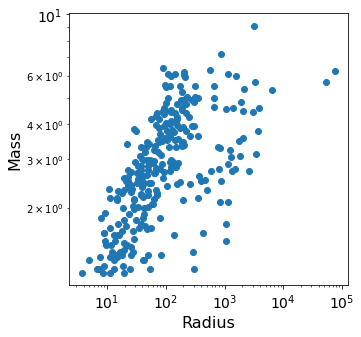

In [28]:
### OK lets do a standard plot! Try making a scatter plot of mass vs radius ['r_eff']
### for each source in the catalog, in log scale with nicely labeled axes etc.
masses = catalog['mass']
radius = catalog['r_eff']

fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5))
ax.scatter(masses, radius)
plt.xlabel('Radius', fontsize = 16)
plt.ylabel('Mass', fontsize = 16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)
#why isn't it changing my y axis tick size?

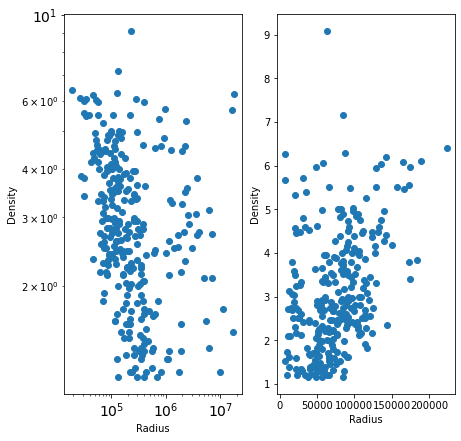

In [74]:
### Great! Now let's try making a couple more similar plots for some 
### of the other catalog properties. Try making two side-by-side scatter plots
### of Density (volume density, catalog['n']) vs radius and then also freefall time
### (catalog['tff']) vs radius.
density = catalog['n']
freefall_time = catalog['tff']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(7,7))
ax = axes[0]
ax.scatter(density, radius)
# plt.xlabel('Radius', fontsize = 16)
# plt.ylabel('Density', fontsize = 16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)

for ax in axes.flat:
    ax.set(xlabel='Radius', ylabel='Density')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

ax1 = axes[1]
ax1.scatter(freefall_time, radius)
# plt.xlabel('Radius', fontsize = 16)
# plt.ylabel('Freefall time', fontsize = 16)
plt.show()
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.tick_params(axis='x',labelsize=14)
ax1.tick_params(axis='y',labelsize=14)

for ax1 in axes.flat:
    ax1.set(xlabel='Radius', ylabel='Freefall time')

# # Hide x labels and tick labels for top plots and y ticks for right plots.
# for ax in axs.flat:
#     ax.label_outer()

#where is my y-axis for the second plot?

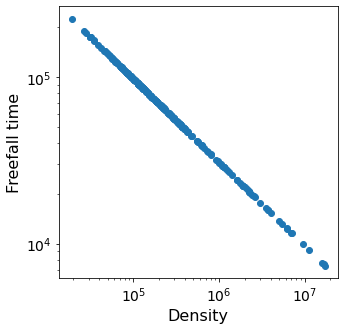

In [44]:
### do you notice anything about these plots? What happens when you make a plot of 
### density vs freefall time. Why do you think it looks like this? 
### Maybe something can explain it in the paper?
fig, ax = plt.subplots(nrows=1,ncols=1,figsize=(5,5)) 
ax.scatter(density, freefall_time)
plt.xlabel('Density', fontsize = 16)
plt.ylabel('Freefall time', fontsize = 16)
ax.set_xscale('log')
ax.set_yscale('log')
ax.tick_params(axis='x',labelsize=14)
ax.tick_params(axis='y',labelsize=14)



In [ ]:
### More challenging one! 
### can you figure out how to make a plot of mass vs radius where the size of each 
### dot is scaled by its density?



In [ ]:
### Even more challenging one! 
### Can you make a plot of mass vs radius where ONLY the star forming leaves are plotted
### in a different color (i.e. red) and maybe using a different shape like a star or a box? 
### the catalog key for star forming status is catalog['sf_final_say']
### where sf_final_say is 1, the leaf is star forming. Where it's 0 its quiescent
### where sf_final_say is 2, the leaf is ambiguously star forming (we can't tell for sure)

